<a href="https://colab.research.google.com/github/JALVARADORUIZ/TFM_UB/blob/main/TFM_modelo_knn_variety.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle
from tqdm import tqdm
tqdm.pandas()

from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
data = '/content/drive/MyDrive/TFM_Máster BDDS/datawine/df_img_processed2.csv'

df = pd.read_csv(data)

In [4]:
df.head(5)

,winery,product,region,country_code,rating,variety,price_usd,image,continente,country_code_clean,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,cathedral ridge,cathedral ridge bangsund vineyard pinot noir 2006,columbia valley oregon,us,3.5,pinot noir,163.000000,vintage-images/MBo5T9ZQQQGbzsRmVORp-w_pl_480x6...,north america,united states,...,0.000000,2.723852,0.112117,1.256278,0.0,0.0,0.688721,0.0,0.0,0.641749
1,penfolds,penfolds rwt shiraz 2005,barossa valley,au,4.5,shiraz syrah,169.950000,vintage-images/dDyTwzIfQC68MCUgjmYWpw_pl_480x6...,oceania,australia,...,1.020779,0.000000,0.000000,2.622155,0.0,0.0,0.290430,0.0,0.0,0.000000
2,marques de riscal,marques de riscal frank gehry selection 2001,rioja,es,5.0,tempranillo,357.196682,vintage-images/t44NPpbUT6uy0vRt4VD2RQ_pl_480x6...,europe,spain,...,0.000000,0.555558,0.000000,0.656157,0.0,0.0,0.000000,0.0,0.0,1.079562
3,wyndham,wyndham pinot noir bin 333 2007,south eastern australia,au,4.0,pinot noir,10.990000,vintage-images/v1RahJe2QQyp4oAFOv90bA_pl_480x6...,oceania,australia,...,0.000000,1.728447,0.707242,0.000000,0.0,0.0,0.000000,0.0,0.0,1.881952
4,louis jadot,louis jadot chevalier montrachet grand cru 2006,chevalier montrachet grand cru,fr,5.0,chardonnay,309.990000,vintage-images/VlMihlZUQE6US7fr09w5ZA_pl_480x6...,europe,france,...,0.000000,2.167833,0.000000,0.000000,0.0,0.0,0.400719,0.0,0.0,2.144384


In [5]:
print(f"Existen {len(df['variety'].value_counts())} variedades de vinos")

Existen 257 variedades de vinos


In [6]:
df_variety = df['variety'].value_counts().rename_axis('variety').to_frame('counts')
df_variety

,counts
variety,
cabernet sauvignon,2215
chardonnay,1030
shiraz syrah,802
pinot noir,714
merlot,519
...,...
symphony,1
moscatel,1
cencibel,1


In [7]:
df_variety_selected = df_variety[:15]
df_variety_selected

,counts
variety,
cabernet sauvignon,2215
chardonnay,1030
shiraz syrah,802
pinot noir,714
merlot,519
sangiovese,431
nebbiolo,339
sauvignon blanc,300
tempranillo,281


In [8]:
list_variety = list(df_variety_selected.index)

def transform_variety(variety, list_variety):
  if variety in list_variety:
    return variety
  else:
    return "other"

df['variety'] = df.progress_apply(lambda x:transform_variety(x.variety,list_variety), axis=1)

100%|██████████| 9878/9878 [00:01<00:00, 5386.64it/s]


Aplicamos Label_encoder a variable objetivo

In [9]:
le = LabelEncoder()
variedad = le.fit_transform(df['variety'])

Seleccionamos variables :

In [10]:
X = df.iloc[:,15:].values
y = variedad

**1. KNN con datos originales (sin escalar ni reduccion de dimensionalidad)**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6914, 4096), (2964, 4096), (6914,), (2964,))

In [13]:
classifier_knn_original = KNeighborsClassifier() #por defecto

In [14]:
classifier_knn_original = classifier_knn_original.fit(X_train, y_train)

In [15]:
y_pred_original = classifier_knn_original.predict(X_test)

In [30]:
result_original = confusion_matrix(y_test, y_pred_original)

print('Confusion Matrix - Clasificador KNN con data original')

print(result_original)
print('Accuracy:', accuracy_score(y_test, y_pred_original))

Confusion Matrix - Clasificador KNN con data original
[[ 37   5   5   1   1   3   2   7   5   0   1   0   2   0   0   0]
 [ 14 508   4   2  15  31  17  54   6   0  24   0  18  16   9   2]
 [  0  10 184   7   2   1   9  49  15   3   1   5   6   4   2   0]
 [  0   6   1  13   0   3   0   7   7   0   0   0  10   0   3   0]
 [  3  33   0   1   8   5   0   6   0   0   1   0   1   0   1   0]
 [  2  77   0   1   4  52   5  16   1   0   7   1   4   0   3   1]
 [  3  18   0   1   2   6  44  10   6   0   1   1   6   0   3   0]
 [  9 116  93   5  10  10  21 192  28   5  11  17  30   1  10   4]
 [  1  12  34  13   2   3  13  26  94   0   2   1  19   1   3   0]
 [  0   2  14   1   0   0   0  18   4   3   0   0   1   1   0   0]
 [  3  46   4   1   2  12   2  21   1   0  27   0   4   1   3   3]
 [  0  17  16   0   1   0   1  31   6   1   1  17   2   0   0   1]
 [  4  44   6  11   6   8  12  36  23   0   4   2  74   3   2   2]
 [  1  33   1   0   2   7   1  10   4   0   1   0   4  15   4   0]
 [  3  2

In [17]:
print(classification_report(y_test,y_pred_original,target_names=le.classes_))

                    precision    recall  f1-score   support

    cabernet franc       0.46      0.54      0.49        69
cabernet sauvignon       0.52      0.71      0.60       720
        chardonnay       0.51      0.62      0.56       298
          grenache       0.23      0.26      0.24        50
            malbec       0.14      0.14      0.14        59
            merlot       0.37      0.30      0.33       174
          nebbiolo       0.34      0.44      0.38       101
             other       0.38      0.34      0.36       562
        pinot noir       0.46      0.42      0.44       224
          riesling       0.25      0.07      0.11        44
        sangiovese       0.32      0.21      0.25       130
   sauvignon blanc       0.39      0.18      0.25        94
      shiraz syrah       0.39      0.31      0.35       237
       tempranillo       0.35      0.18      0.24        83
  touriga nacional       0.36      0.33      0.34        76
         zinfandel       0.28      0.12

In [18]:
print("Test accuracy: %.3f" % classifier_knn_original.score(X_test, y_test))

Test accuracy: 0.438


**2. KNN escalando datos y utilizando PCA**

Escalado de datos

In [11]:
#normalizamos los datos
scaler=StandardScaler()

scaler.fit(X) # calculo la media para poder hacer la transformacion
X_scaled=scaler.transform(X)# Ahora si, escalo los datos y los normalizo

Busqueda de n_components PCA

n_components=100

suma: 0.5271888027516296


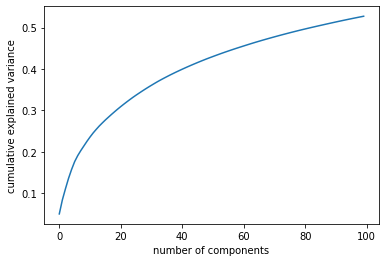

In [20]:
#Instanciamos objeto PCA y aplicamos
pca=PCA(n_components=100) 
pca.fit(X_scaled) # obtener los componentes principales
X_pca=pca.transform(X_scaled) # convertimos nuestros datos con las nuevas dimensiones de PCA
 
#print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
#print(expl)
print('suma:',sum(expl[0:100]))

 
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

n_components = 500

suma: 0.7814950749204196


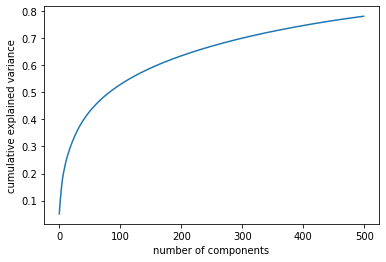

In [21]:
#Instanciamos objeto PCA y aplicamos
pca=PCA(n_components=500) 
pca.fit(X_scaled) # obtener los componentes principales
X_pca=pca.transform(X_scaled) # convertimos nuestros datos con las nuevas dimensiones de PCA
 
#print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
#print(expl)
print('suma:',sum(expl[0:500]))

 
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

n_components = 1000

suma: 0.8897302235718954


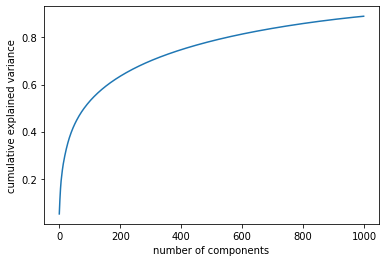

In [22]:
#Instanciamos objeto PCA y aplicamos
pca=PCA(n_components=1000) 
pca.fit(X_scaled) # obtener los componentes principales
X_pca=pca.transform(X_scaled) # convertimos nuestros datos con las nuevas dimensiones de PCA
 
#print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
#print(expl)
print('suma:',sum(expl[0:1000]))

 
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Considerando que con n_components = 1000 se explica cerca del 90% de la varianza se realiza reduccion de dimensionalidad utilizando PCA.

In [12]:
pca = PCA(n_components=1000, random_state=22)
pca.fit(X_scaled)
X = pca.transform(X_scaled)


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6914, 4096), (2964, 4096), (6914,), (2964,))

In [43]:
param_grid =[
              {'weights':['uniform'],
               'n_neighbors':[3,5]
              },
              {
               'weights':['distance'],
               'n_neighbors':[3,5],
               'p':[3,5]
              }
             ]

In [44]:
gs_knn = GridSearchCV(estimator=KNeighborsClassifier(),
                      param_grid = param_grid,
                      scoring='accuracy',
                      cv=2,
                      verbose=2,
                      n_jobs=-1)

In [45]:
gs_knn = gs_knn.fit(X_train, y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


***best_params: {'n_neighbors': 5, 'p': 3, 'weights': 'distance'}***

In [26]:
classifier_knn_pca = KNeighborsClassifier(n_neighbors=5, p=3, weights='distance')

In [27]:
classifier_knn_pca.fit(X_train, y_train)

KNeighborsClassifier(p=3, weights='distance')

In [28]:
y_pred_pca = classifier_knn_pca.predict(X_test)

In [31]:
result_pca = confusion_matrix(y_test, y_pred_pca)

print('Confusion Matrix - Clasificador KNN Escaladao y PCA optimizado')

print(result_pca)
print('Accuracy:', accuracy_score(y_test, y_pred_pca))

Confusion Matrix - Clasificador KNN Escaladao y PCA optimizado
[[ 40   3   2   1   0   1   1   8   6   0   1   1   4   0   1   0]
 [  8 522   5   4  12  24  11  54  11   1  12   2  26  12   9   7]
 [  0   7 171   4   3   1   7  61  19   2   2   8   7   3   2   1]
 [  0   4   1  22   0   4   0   7   7   0   0   0   4   0   1   0]
 [  2  28   0   1  11   4   0   7   0   0   1   0   4   0   0   1]
 [  1  52   0   2   2  75   2  14   2   0   8   1   8   2   2   3]
 [  1   9   0   1   2   3  60  11   6   0   0   1   6   0   1   0]
 [  3  78  68   3   7  12  17 231  40   5  17  21  43   3  10   4]
 [  0   8  31  11   2   3   8  32 101   1   1   1  20   1   3   1]
 [  0   2   9   1   0   1   0  15   5   8   0   0   2   1   0   0]
 [  1  27   0   1   1   6   3  22   2   0  50   0   4   5   5   3]
 [  0  12  16   0   1   1   0  26   7   0   1  26   2   0   0   2]
 [  3  35   5   6   3  10   7  35  20   0   6   2 100   3   0   2]
 [  1  16   1   0   2   6   1  10   5   0   3   0   7  28   3   0]

In [32]:
print(classification_report(y_test,y_pred_pca,target_names=le.classes_))

                    precision    recall  f1-score   support

    cabernet franc       0.62      0.58      0.60        69
cabernet sauvignon       0.63      0.72      0.68       720
        chardonnay       0.55      0.57      0.56       298
          grenache       0.39      0.44      0.41        50
            malbec       0.22      0.19      0.20        59
            merlot       0.49      0.43      0.46       174
          nebbiolo       0.50      0.59      0.54       101
             other       0.42      0.41      0.42       562
        pinot noir       0.43      0.45      0.44       224
          riesling       0.47      0.18      0.26        44
        sangiovese       0.48      0.38      0.43       130
   sauvignon blanc       0.41      0.28      0.33        94
      shiraz syrah       0.40      0.42      0.41       237
       tempranillo       0.47      0.34      0.39        83
  touriga nacional       0.49      0.49      0.49        76
         zinfandel       0.23      0.16

In [33]:
print("Test accuracy: %.3f" % classifier_knn_pca.score(X_test, y_test))

Test accuracy: 0.502


Validacion cruzada anidada:

In [53]:
#scores = cross_val_score(gs_knn,X_train,y_train, scoring='accuracy',cv=5)
#print('CV accuracy: %3.f +/-' % (np.mean(scores), np.std(scores)))

**3. KNN aplicando oversampling**

In [13]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy="not majority")
X_res, y_res = ros.fit_resample(X,y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.3, random_state=42)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24808, 1000), (10632, 1000), (24808,), (10632,))

In [15]:
classifier_knn_balanced = KNeighborsClassifier(n_neighbors=5, p=3, weights='distance')
classifier_knn_balanced.fit(X_train, y_train)

KNeighborsClassifier(p=3, weights='distance')

In [ ]:
y_pred_balanced = classifier_knn_balanced.predict(X_test)

In [ ]:
result_balanced = confusion_matrix(y_test, y_pred_balanced)

print('Confusion Matrix - Clasificador KNN optimizado y Balanceado')

print(result_balanced)
print('Accuracy:', accuracy_score(y_test, y_pred_balanced))

In [ ]:
print(classification_report(y_test,y_pred_balanced,target_names=le.classes_))

In [ ]:
print("Test accuracy: %.3f" % classifier_knn_balanced.score(X_test, y_test))